## Анализ данных по COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_0 = pd.read_csv("data/covid_19_data.csv")
df_0.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
# Проверяем последнюю дату
df_0["ObservationDate"].iloc[-1]

'05/29/2021'

In [7]:
# Удаление ненужных столбцов
df_1 = df_0.drop(['SNo','Last Update'], axis=1)
df_1.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [11]:
# Проверка на дубликаты
df_1.duplicated().sum()

0

In [10]:
# Удаление дубликатов
df_1.drop_duplicates(inplace=True)

In [15]:
# Изучение стран
df_1['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', 'Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia',
       'Portugal', 'Andorra', '

In [13]:
# Убираем артефакты из названий стран
df_1['Country/Region'] = df_1['Country/Region'].str.strip(" ,()'")

In [16]:
# Изучаем страну под название "Others"
df_1.loc[df_1['Country/Region']== "Others", :]

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
965,02/07/2020,Cruise Ship,Others,61.0,0.0,0.0
1039,02/08/2020,Cruise Ship,Others,61.0,0.0,0.0
1113,02/09/2020,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1181,02/10/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1255,02/11/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1328,02/12/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1403,02/13/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1479,02/14/2020,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1554,02/15/2020,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1628,02/16/2020,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [18]:
# Конвертация временных данных
date = "03/23/2020"
pd.to_datetime(date).date()

datetime.date(2020, 3, 23)

In [20]:
# Конвертируем строку даты в объект Timestamp
df_2 = df_1.copy()

df_2["ObservationDate"] = pd.to_datetime(df_2["ObservationDate"])
df_2["ObservationDate"][0]

Timestamp('2020-01-22 00:00:00')

In [21]:
# Поэлементно извлекаем даты (без часов/минут/секунд)
def get_date(ts):
    return ts.date()

# df_2["ObservationDate"] = df_2["ObservationDate"].apply(get_date)
df_2["ObservationDate"] = df_2["ObservationDate"].apply(lambda ts: ts.date())
df_2["ObservationDate"][0]

datetime.date(2020, 1, 22)

- Анализ данных

In [23]:
# Группируем данные по странам и датам
cd_data = df_2.groupby(['Country/Region', 'ObservationDate']).sum()
cd_data.head(15)

Province/State  Confirmed  Deaths  Recovered
Country/Region ObservationDate                                             
Afghanistan    2020-02-24                   0        1.0     0.0        0.0
               2020-02-25                   0        1.0     0.0        0.0
               2020-02-26                   0        1.0     0.0        0.0
               2020-02-27                   0        1.0     0.0        0.0
               2020-02-28                   0        1.0     0.0        0.0
               2020-02-29                   0        1.0     0.0        0.0
               2020-03-01                   0        1.0     0.0        0.0
               2020-03-02                   0        1.0     0.0        0.0
               2020-03-03                   0        2.0     0.0        0.0
               2020-03-04                   0        4.0     0.0        0.0
               2020-03-05                   0        4.0     0.0        0.0
               2020-03-06                   0        4.0     0.0        0.0
               2020-03-07                   0        4.0     0.0        0.0
               2020-03-08                   0        5.0     0.0        0.0
               2020-03-09                   0        7.0     0.0        0.0

In [25]:
# Вывод данных по конкретной стране на конкретную дату
date = "2020-03-07"
date = pd.to_datetime(date).date()

cd_data.loc["Russia", :].loc[date, :]

Province/State       0
Confirmed         13.0
Deaths             0.0
Recovered          2.0
Name: 2020-03-07, dtype: object

In [37]:
# Данные максимумов по странам
max_df = cd_data.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered']].max()
max_df.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,70111.0,2899.0,57281.0
Albania,132297.0,2449.0,129215.0
Algeria,128456.0,3460.0,89419.0
Andorra,13693.0,127.0,13416.0
Angola,34180.0,757.0,27646.0


In [38]:
max_df.sort_values('Confirmed', ascending = False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,33251939.0,594306.0,6399531.0
India,27894800.0,325972.0,25454320.0
Brazil,16471600.0,461057.0,14496224.0
France,5978650.0,109518.0,390878.0
Turkey,5235978.0,47271.0,5094279.0
Russia,4995613.0,118781.0,4616422.0
UK,4496823.0,128037.0,15481.0
Italy,4213055.0,126002.0,3845087.0
Argentina,3732263.0,77108.0,3288467.0


In [41]:
# Группируем по датам (по всему миру)
w_data = df_2.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum()
w_data.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,653.0,17.0,32.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


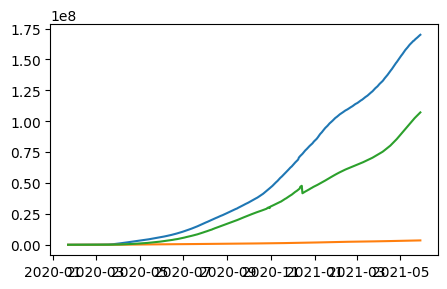

In [44]:
# Визуализация динамики пандемии по всему миру
plt.figure(figsize=(5,3))

idx = w_data.index

plt.plot(idx, w_data['Confirmed'])
plt.plot(idx, w_data['Deaths'])
plt.plot(idx, w_data['Recovered'])
plt.show()

In [46]:
# Группировка по странам, провинциям и датам
cpd_data = df_2.groupby(['Country/Region','Province/State','ObservationDate']).sum()
cpd_data.head()

Confirmed  \
Country/Region Province/State               ObservationDate              
Australia      Australian Capital Territory 2020-03-13             1.0   
                                            2020-03-14             1.0   
                                            2020-03-15             1.0   
                                            2020-03-16             2.0   
                                            2020-03-17             2.0   

                                                             Deaths  Recovered  
Country/Region Province/State               ObservationDate                     
Australia      Australian Capital Territory 2020-03-13          0.0        0.0  
                                            2020-03-14          0.0        0.0  
                                            2020-03-15          0.0        0.0  
                                            2020-03-16          0.0        0.0  
                                            2020-03-17          0.0        0.0

In [47]:
# Извлечение данных по определенной стране
ru_data = cpd_data.loc["Russia", :]
ru_data.head()

Confirmed  Deaths  Recovered
Province/State  ObservationDate                              
Adygea Republic 2020-06-01           874.0     9.0      394.0
                2020-06-02           890.0     9.0      413.0
                2020-06-03           904.0     9.0      465.0
                2020-06-04           937.0     9.0      487.0
                2020-06-05           962.0     9.0      519.0

In [48]:
ru_data.index.get_level_values("Province/State").unique()

Index(['Adygea Republic', 'Altai Krai', 'Altai Republic', 'Amur Oblast',
       'Arkhangelsk Oblast', 'Astrakhan Oblast', 'Bashkortostan Republic',
       'Belgorod Oblast', 'Bryansk Oblast', 'Buryatia Republic',
       'Chechen Republic', 'Chelyabinsk Oblast', 'Chukotka Autonomous Okrug',
       'Chuvashia Republic', 'Dagestan Republic', 'Ingushetia Republic',
       'Irkutsk Oblast', 'Ivanovo Oblast', 'Jewish Autonomous Okrug',
       'Kabardino-Balkarian Republic', 'Kaliningrad Oblast',
       'Kalmykia Republic', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Karelia Republic', 'Kemerovo Oblast',
       'Khabarovsk Krai', 'Khakassia Republic',
       'Khanty-Mansi Autonomous Okrug', 'Kirov Oblast', 'Komi Republic',
       'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast', 'Lipetsk Oblast',
       'Magadan Oblast', 'Mari El Republic', 'Mordovia Republic', 'Moscow',
       'Moscow Oblast', 'Mu

In [49]:
# Группируем данные по республике Саха
ykt_data = ru_data.loc["Sakha (Yakutiya) Republic", :]
ykt_data.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-06-01,2042.0,8.0,903.0
2020-06-02,2116.0,8.0,943.0
2020-06-03,2214.0,9.0,1015.0
2020-06-04,2308.0,11.0,1071.0
2020-06-05,2380.0,14.0,1177.0
2020-06-06,2453.0,15.0,1242.0
2020-06-07,2531.0,15.0,1311.0
2020-06-08,2611.0,15.0,1343.0
2020-06-09,2686.0,15.0,1428.0


In [6]:
df_0.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')